<a href="https://colab.research.google.com/github/orenfix10/ML-project1/blob/main/Copy_of_Ex3_2023a_Ensemble_competition_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Names and IDs
 1. 315666479
 2. 318595386

# I. Condorcet's Jury Theorem (1785) (15 points)

Assume voter probability to be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

In [1]:
# Implement here

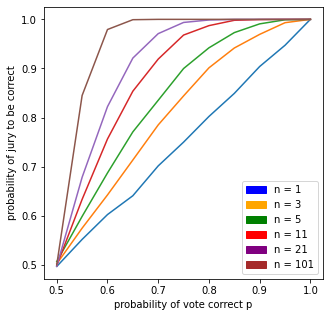

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def sampels(n,p,m):
  sampels = p_values = np.random.binomial(1, p, size = (m,n))
  sampels = sampels.sum(axis=1,dtype = 'float')
  sampels = sampels[sampels > n/2]
  return len(sampels)/m


def sim(m):
  n = [1, 3, 5, 11, 21, 101]
  p = np.linspace(0.5, 1.0, 11)
  prob = [[sampels(n_, p_, m) for p_ in p] for n_ in n]
  return np.array(prob)


m = 10000
probability  = sim(m)


x = np.linspace(0.5, 1.0, 11)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.plot(x, probability.T)
plt.ylabel('probability of jury to be correct')
plt.xlabel('probability of vote correct p')
arr1 = plt.arrow(0,0, 0,0, head_width=0.2, color='blue', length_includes_head=True)
arr2 = plt.arrow(0,0, 0,0, head_width=0.2, color='orange', length_includes_head=True)
arr3 = plt.arrow(0,0, 0,0, head_width=0.2, color='green', length_includes_head=True)
arr4 = plt.arrow(0,0, 0,0, head_width=0.2, color='red', length_includes_head=True)
arr5 = plt.arrow(0,0, 0,0, head_width=0.2, color='purple', length_includes_head=True)
arr6 = plt.arrow(0,0, 0,0, head_width=0.2, color='brown', length_includes_head=True)
plt.legend([arr1, arr2, arr3, arr4, arr5, arr6], ['n = 1', 'n = 3', 'n = 5', 'n = 11', 'n = 21', 'n = 101'])
plt.show()


Your proves goes here

ASSUME:

* each individual has a vote $X_i$, that will take the value $+1$ (for voting yes) or $-1$ (for voting no).
* the group decision depending on all voters, whether $S_n= \sum_{i=1}^n X_i$ is positive or negative.

* xi=1,...,n  are independent of one another, and each voter probability to be right its  $p > \frac{1}{2}$.

We will try to prove that when $n \rightarrow \infty $, the probability of the group to get correct decision by majority vote will be tend to $1$.

We will use the weak law of large numbers:
* let $b = p-1/2>0$ ($p > \frac{1}{2}$)
* the general decision can be $+$ or $-$, we may without loss of generality assume the correct answer is $+$.
*$EX_1= -(\frac{1}{2}-b) + (\frac{1}{2}+b) = - \frac{1}{2} + b +\frac{1}{2} +b = 2b $
*The weak law of numbers states that $\frac{S_n}{n}$ in probability to $EX_1=2b$.
* means for any $\varepsilon_1 , \varepsilon_2>0$, there is $N$ large enough such that for $n \geq N,$
\begin{align}
\text P(|\frac{S_n}{n}-EX_1| < \varepsilon_1) > 1 - \varepsilon_2
\end{align}
* lets take $\varepsilon_1=2b$, we see that the probability for a correct decision of the group is:
\begin{align}
\text P(S_n>0) = P(\frac{S_n}{n}>0) \geq P(|\frac{S_n}{n}-2b|<2b) \rightarrow 1  
\end{align}




# II. AdaBoost (35 points)
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm) with the next parameters:
        - *tol=1e-5,loss='hinge', C=1e5, max_iter=1e6*
    - Split the sample set into 2/3rd train set and 1/3 test set.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function plot_data or your own function to plot the final decision plane of each ensemble model.

* Answer to the next questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note:** 
 * Explain you results in text and support it with figures.

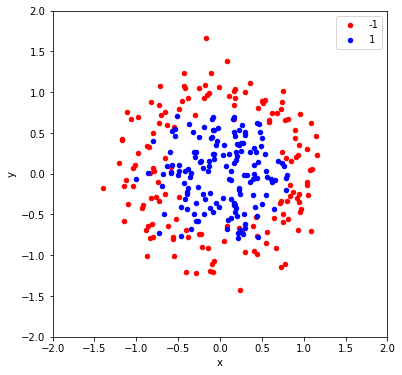

In [20]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [21]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accepts X and returns the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics


list_estimators = [1,3,10,50,100,1000,10000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=5)
history= {'train_acc': [], 'test_acc': []}

def train_AdaBoostt(n, X_train, X_test, y_train, y_test):
  clf = AdaBoostClassifier( LinearSVC(tol=1e-5,loss='hinge', C=1e5, max_iter=1e6)  ,n_estimators = n, random_state = 42, algorithm='SAMME')
  clf.fit(X_train, y_train)
  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
  return clf,y_pred_train,y_pred_test

Number of estimators: 1
Train Accuracy : 0.52
Test Accuracy with : 0.46
Avg error : 0.4800000000000001
----------------------------------------------------------------


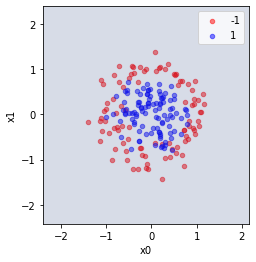

In [23]:
n_estimators = 1
fig, ax = plt.subplots(figsize=(20,4))
clf,y_pred_train,y_pred_test = train_AdaBoostt(n_estimators, X_train, X_test, y_train, y_test)
train_acc = metrics.accuracy_score(y_train, y_pred_train)
test_acc =  metrics.accuracy_score(y_test, y_pred_test)

history['train_acc'].append(train_acc)
history['test_acc'].append(test_acc)

number_of_estimators_the_model_used_1 = len(clf.estimator_errors_[clf.estimator_errors_<1])

print(f"Number of estimators: {1}")
print("Train Accuracy :",train_acc)
print("Test Accuracy with :", test_acc)
print("Avg error :",sum(clf.estimator_errors_) / n_estimators)
print("----------------------------------------------------------------") 

# plot graph for each estimator 
plot_data(X_train, y_train, clf.predict, ax)

Number of estimators: 3
Train Accuracy : 0.6
Test Accuracy : 0.5
Avg error : 0.45149596993762464
----------------------------------------------------------------


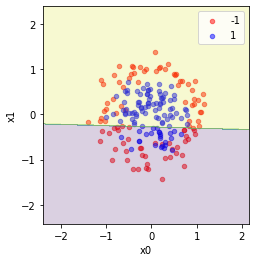

In [24]:
n_estimators = 3
fig, ax = plt.subplots(figsize=(20,4))
clf,y_pred_train,y_pred_test = train_AdaBoostt(n_estimators, X_train, X_test, y_train, y_test)
train_acc = metrics.accuracy_score(y_train, y_pred_train)
test_acc =  metrics.accuracy_score(y_test, y_pred_test)

history['train_acc'].append(train_acc)
history['test_acc'].append(test_acc)
number_of_estimators_the_model_used_3 = len(clf.estimator_errors_[clf.estimator_errors_<1])

print(f"Number of estimators: {3}")
print("Train Accuracy :",train_acc)
print("Test Accuracy :", test_acc)
print("Avg error :",sum(clf.estimator_errors_) / n_estimators)
print("----------------------------------------------------------------") 
# plot graph for each estimator 
plot_data(X_train, y_train, clf.predict, ax)

Number of estimators: 10
Train Accuracy : 0.65
Test Accuracy : 0.67
Avg error : 0.4527360820996151
----------------------------------------------------------------


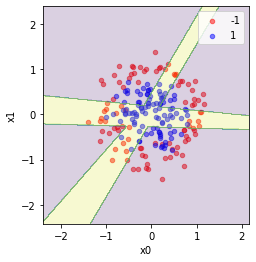

In [25]:
n_estimators = 10
fig, ax = plt.subplots(figsize=(20,4))
clf,y_pred_train,y_pred_test = train_AdaBoostt(n_estimators, X_train, X_test, y_train, y_test)
train_acc = metrics.accuracy_score(y_train, y_pred_train)
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
history['train_acc'].append(train_acc)
history['test_acc'].append(test_acc)
number_of_estimators_the_model_used_10 = len(clf.estimator_errors_[clf.estimator_errors_<1])

print(f"Number of estimators: {10}")
print("Train Accuracy :",train_acc)
print("Test Accuracy :", test_acc)
print("Avg error :",sum(clf.estimator_errors_) / n_estimators)
print("----------------------------------------------------------------") 
# plot graph for each estimator 
plot_data(X_train, y_train, clf.predict, ax)

Number of estimators: 50
Train Accuracy : 0.73
Test Accuracy : 0.67
Avg error : 0.5901969151386092
----------------------------------------------------------------


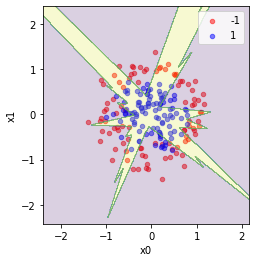

In [26]:
n_estimators = 50
fig, ax = plt.subplots(figsize=(20,4))
clf,y_pred_train,y_pred_test = train_AdaBoostt(n_estimators, X_train, X_test, y_train, y_test)
train_acc = metrics.accuracy_score(y_train, y_pred_train)
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
history['train_acc'].append(train_acc)
history['test_acc'].append(test_acc)
number_of_estimators_the_model_used_50 = len(clf.estimator_errors_[clf.estimator_errors_<1])

print(f"Number of estimators: {50}")
print("Train Accuracy :",train_acc)
print("Test Accuracy :", test_acc)
print("Avg error :",sum(clf.estimator_errors_) / n_estimators)
print("----------------------------------------------------------------") 
# plot graph for each estimator 
plot_data(X_train, y_train, clf.predict, ax)

Number of estimators: 100
Train Accuracy : 0.73
Test Accuracy : 0.67
Avg error : 0.7950984575693046
----------------------------------------------------------------


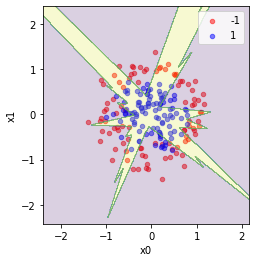

In [27]:
n_estimators = 100
fig, ax = plt.subplots(figsize=(20,4))
clf,y_pred_train,y_pred_test = train_AdaBoostt(n_estimators, X_train, X_test, y_train, y_test)
train_acc = metrics.accuracy_score(y_train, y_pred_train)
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
history['train_acc'].append(train_acc)
history['test_acc'].append(test_acc)
number_of_estimators_the_model_used_100 = len(clf.estimator_errors_[clf.estimator_errors_<1])

print(f"Number of estimators: {100}")
print("Train Accuracy :",train_acc)
print("Test Accuracy :", test_acc)
print("Avg error :",sum(clf.estimator_errors_) / n_estimators)
print("----------------------------------------------------------------") 
# plot graph for each estimator 
plot_data(X_train, y_train, clf.predict, ax)

Number of estimators: 1000
Train Accuracy : 0.73
Test Accuracy : 0.67
Avg error : 0.9795098457569305
----------------------------------------------------------------


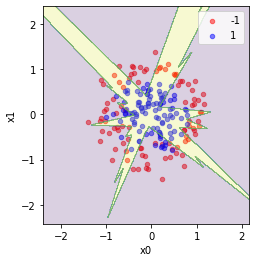

In [28]:
n_estimators = 1000
fig, ax = plt.subplots(figsize=(20,4))
clf,y_pred_train,y_pred_test = train_AdaBoostt(n_estimators, X_train, X_test, y_train, y_test)
train_acc = metrics.accuracy_score(y_train, y_pred_train)
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
history['train_acc'].append(train_acc)
history['test_acc'].append(test_acc)
number_of_estimators_the_model_used_1000 = len(clf.estimator_errors_[clf.estimator_errors_<1])

print(f"Number of estimators: {1000}")
print("Train Accuracy :",train_acc)
print("Test Accuracy :", test_acc)
print("Avg error :",sum(clf.estimator_errors_) / n_estimators)
print("----------------------------------------------------------------") 
# plot graph for each estimator 
plot_data(X_train, y_train, clf.predict, ax)

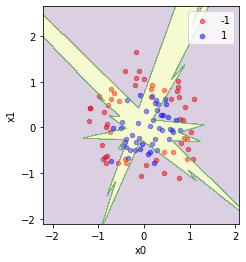

In [29]:
# plot the best estimator graph
fig, ax = plt.subplots()
plot_data(X_test, y_test, clf.predict, ax)

# Questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

**1. The overall train set accuracy is getting grower until 50 estimators, after that it is doesn't change. As we can see, with one estimator we get 0.52 accuracy on the training set, and starting from 50 estimators we get 0.73 accuracies.**

**2.** **Yes, the model start to overfit after 10 estimators. In order to detect it we plot the train and test accuracy graph. As we can see, until 10 estimators the accuracy on the test set increase until it stabilizes, while the accuracy on the training set continues to increase after 10 estimators until it stabilizes.**

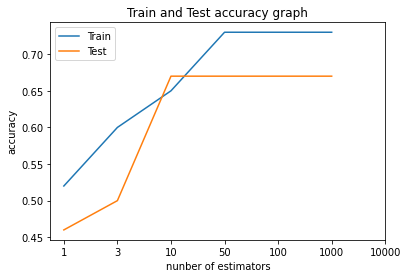

In [35]:
# plot train and test accuracy graph
xi = list(range(len(list_estimators)))
fig = plt.figure(figsize=(6,4))
plt.plot(history['train_acc'], label='Train')
plt.plot(history['test_acc'], label='Test')
plt.xlabel('nunber of estimators')
plt.ylabel('accuracy')
plt.xticks(xi,list_estimators)
plt.legend()
plt.title('Train and Test accuracy graph')
plt.show()

**3.** **The optimal number of estimators is 38.
In the number of 38 estimators we get the best number of weak classifiers. Meaning they succession in recognizing and classified the right objects. So, we can see that from 38 estimators, there is no improvement in recognizing of the objects.**

In [30]:
print(f"Estimators {1}:", number_of_estimators_the_model_used_1)
print(f"Estimators {3}:", number_of_estimators_the_model_used_3)
print(f"Estimators {10}: ", number_of_estimators_the_model_used_10)
print(f"Estimators {50}: ", number_of_estimators_the_model_used_50)
print(f"Estimators {100}: ", number_of_estimators_the_model_used_100)
print(f"Estimators {1000}: ", number_of_estimators_the_model_used_1000)

Estimators 1: 1
Estimators 3: 3
Estimators 10:  10
Estimators 50:  38
Estimators 100:  38
Estimators 1000:  38


---
# Section 2 - Kaggle competition
---

# miRNA animals interaction prediction (50 pts + 10 pts)
In this section, you will explain the tools and methods you used in the competition. Fifty points will be given according to the explanations of the section and up to ten additional points according to your relative position in the competition. Participate in the following contest and answer the following questions:
https://www.kaggle.com/t/3c2cb35d174c287b7fcaf1c716f523ef





### EDA - Exploratory Data Analysis (10 pts):
Use any visual tools to present and explain the data. Your answer must include statistics, images, and conclusions. 

***Write your code below***


# Imports + Data

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [11]:
שdf_x = pd.read_csv("/content/x_train.csv")
df_y = pd.read_csv("/content/y_train.csv")

FileNotFoundError: ignored

# Visualization

In [ ]:
# show the 5 firsts rows
df_x.head()

In [ ]:
sns.set(rc={'figure.figsize':(24,20)})
for i, column in enumerate(list(df_x.columns), 1):
    plt.subplot(8,11,i)
    p=sns.histplot(x=column,data=df_x.sample(1000),stat='count',kde=True,color='green')

In [ ]:
# Explain here

### Preprocessing (10 pts):
Describe in detail what did you do in the preprocessing phase and why you did it. 

***Write your code below***

In [ ]:
# Implement here

In [ ]:
# Explain here

### Model training (10 pts):
Train your ML model.
Explain in detail what model you used to achieve your highest score, what the hyper-parameters were, and why did you choose both the model and these parameters.
Attach at least two learning plot and explain them.

***Write your code below***

In [ ]:
# Implement here

In [ ]:
# Explain here

### Model evaluation (10 pts):
Eevaluate your ML model using different evaluation metrics.
For every evaluation metric mention below add your model score and answer the following questions:

What does this evaluation metric mean? is it relevant to this prediction task?
Do you think the score you got is good for this task?


***Write your code below***

In [ ]:
# Implement here

In [ ]:
# List of evaluation metrics
# Accuracy -
# Balanced Accuracy -
# Micro Precision -
# Micro Recall -
# Micro F1-score -
# Macro Precision -
# Macro Recall -
# Macro F1-score -
# Weighted Precision -
# Weighted Recall -
# Weighted F1-score -

### Explainability (10 pts):
Explain the results of your model using SHAP and attach relevant outputs. Explain at least three conclusions following the SHAP outputs.

**Note:**
Use the animal names in your conclusions and not the label numbers.

***Write your code below***

In [ ]:
# Implement here

In [ ]:
# Explain here

### Competition rank (10 pts):
The competition will end on 29.12 at 23:59. The results of the competition will be published about 12 hours later under the private tab on the leaderboard.

The scoring of this section is relative to the location (between 0-10 pts).

Indicate here your team name in the competition and **attach an additinal notebook\python code** with which we can reproduce the rank you received.


In [ ]:
# My team name was:
'wakanda forever'